# Задание 2. Вариант 5.
Раскрой материала
На складе имеется 110 листов материала размером 100 см * 100 см и деловые отходы вида 

waste_figure

в количестве 50 штук.
В цех поступил заказ на изготовление деталей следующих форм:

1) невыпуклая фигура штук

2) квадрат 30 см * 30 см штук

3) круг радиусом 20 см штук

4) невыпуклая фигура из двух прямоугольников штук

5) невыпуклая фигура из двух прямоугольников штук

In [122]:
import numpy as np
scale_multiplier = 1

material_figure = np.zeros((100*scale_multiplier, 100*scale_multiplier))
# material_figure

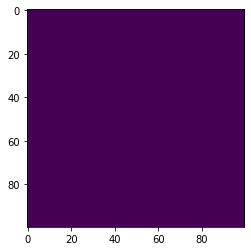

In [2]:
import matplotlib.pyplot as plt
plt.imshow(material_figure)

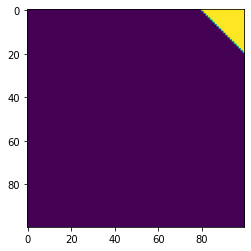

In [3]:
waste_figure = np.zeros((100*scale_multiplier, 100*scale_multiplier))
for i in range(0, 20*scale_multiplier):
    for j in range(80*scale_multiplier+i, 100*scale_multiplier):
        waste_figure[i,j] = 1
plt.imshow(waste_figure)

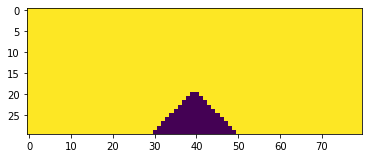

In [4]:
figure_1 = np.ones((30*scale_multiplier, 80*scale_multiplier))
for i in range(30*scale_multiplier, 40*scale_multiplier):
    for j in range(1, i-30*scale_multiplier+2):
        figure_1[-j, i] = 0
for i in range(40*scale_multiplier, 50*scale_multiplier):
    for j in range(1, 50*scale_multiplier+1-i):
        figure_1[-j, i] = 0
plt.imshow(figure_1)

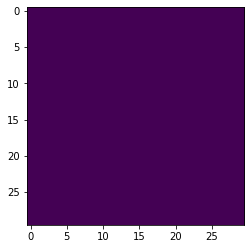

In [5]:
figure_2 = np.ones((30*scale_multiplier, 30*scale_multiplier))
plt.imshow(figure_2)

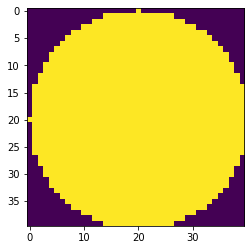

In [6]:
figure_3 = np.zeros((40*scale_multiplier, 40*scale_multiplier))
for i in range(40*scale_multiplier):
    for j in range(40*scale_multiplier):
        if (i-20*scale_multiplier)**2+(j-20*scale_multiplier)**2<=(20*scale_multiplier)**2:
            figure_3[i, j] = 1
plt.imshow(figure_3)

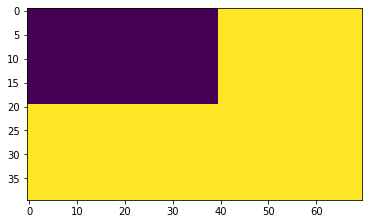

In [7]:
figure_4 = np.ones((40*scale_multiplier, 70*scale_multiplier))
for i in range(20*scale_multiplier):
    for j in range(40*scale_multiplier):
        figure_4[i, j] = 0
plt.imshow(figure_4)

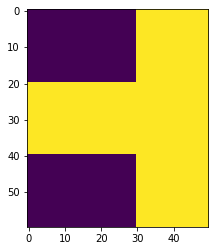

In [8]:
figure_5 = np.ones((60*scale_multiplier, 50*scale_multiplier))
for i in range(20*scale_multiplier):
    for j in range(30*scale_multiplier):
        figure_5[i, j] = 0
for i in range(20*scale_multiplier+1):
    for j in range(30*scale_multiplier):
        figure_5[-i, j] = 0
plt.imshow(figure_5)

In [10]:
available_material_figures = [material_figure, waste_figure]
requested_figures = [figure_1, figure_2, figure_3, figure_4, figure_5]

In [11]:
from scipy import ndimage
# plt.imshow(ndimage.rotate(figure_5, 30), interpolation='none')

In [12]:
import itertools
def fit_figure_in_the_container(container, figure, k):
    figure_mask = figure>0
    fit_y = 0
    fit_x = -1
    start_y = 0
    for start_x, start_y in itertools.product(range(container.shape[1]), range(container.shape[0])):
#         print(start_y, container[start_y : start_y + figure.shape[0], start_x: start_x + figure.shape[1]].shape)
        if start_y + figure.shape[0]>len(container) or start_x + figure.shape[1] > len(container[0]):
            continue
        if np.sum(container[start_y : start_y + figure.shape[0], start_x: start_x + figure.shape[1]][figure_mask]) == 0 :
            container[start_y : start_y + figure.shape[0], start_x: start_x + figure.shape[1]][figure_mask] = figure[figure_mask][0]*k
            fit_x = start_x
            fit_y = start_y
            break
    if fit_x >= 0:  
        return container, True
        
    
    return container, False


In [96]:
def rotate(figure, deg):
    r = ndimage.rotate(figure, deg)
    r[np.abs(r) < 0.1] = 0
    return r

In [119]:
def calc_1(fig_num):
    container = np.copy(available_material_figures[0])
    image_count = np.zeros(5)

    k = 2
    for fig_idx, rot in zip([0, 3, 4, 2, 1], [True, True, True, False, False]):
        for _ in range(fig_num[fig_idx]):
            container, status = fit_figure_in_the_container(container, requested_figures[fig_idx], k)
            if status:
                image_count[fig_idx]+=1
                k+=1
                continue
            #not status
            if rot:
                st = False
                for deg in [90, 180, 270]:
                    container, st = fit_figure_in_the_container(container, rotate(requested_figures[fig_idx], deg), k)
                    if st:
                        image_count[fig_idx]+=1
                        k+=1
                        break
                else:
#                     images[image_id]=container
#                     image_id+=1
                    break
            else:
#                 images[image_id]=container
#                 image_id+=1
                break

    return container, image_count

def calc_2(fig_num):
    container = np.copy(available_material_figures[1])
    image_count = np.zeros(5)

    k = 2
    for fig_idx, rot in zip([0, 3, 4, 2, 1], [True, True, True, False, False]):
        for _ in range(fig_num[fig_idx]):
            container, status = fit_figure_in_the_container(container, requested_figures[fig_idx], k)
            if status:
                image_count[fig_idx]+=1
                k+=1
                continue
            #not status
            if rot:
                st = False
                for deg in [90, 180, 270]:
                    container, st = fit_figure_in_the_container(container, rotate(requested_figures[fig_idx], deg), k)
                    if st:
                        image_count[fig_idx]+=1
                        k+=1
                        break
                else:
#                     images[image_id]=container
#                     image_id+=1
                    break
            else:
#                 images[image_id]=container
#                 image_id+=1
                break

    return container, image_count

In [15]:
# from tqdm.notebook import tqdm


# combinations = list(itertools.product(range(4), range(10), range(6), range(6), range(6)))
# images = np.zeros((len(combinations), 100, 100))
# image_count = np.zeros((len(combinations), 5))
# image_id = 0
# for fig_num in tqdm(combinations):
#     container = np.copy(available_material_figures[0])
    
#     k = 2
#     for fig_idx, rot in zip([0, 3, 4, 2, 1], [True, True, True, False, False]):
#         for _ in range(fig_num[fig_idx]):
#             container, status = fit_figure_in_the_container(container, requested_figures[fig_idx], k)
#             if status:
#                 image_count[image_id][fig_idx]+=1
#                 k+=1
#                 continue
#             #not status
#             if rot:
#                 st = False
#                 for deg in [90, 180, 270]:
#                     container, st = fit_figure_in_the_container(container, rotate(requested_figures[fig_idx], deg), k)
#                     if st:
#                         image_count[image_id][fig_idx]+=1
#                         k+=1
#                         break
#                 else:
# #                     images[image_id]=container
# #                     image_id+=1
#                     break
#             else:
# #                 images[image_id]=container
# #                 image_id+=1
#                 break

#     images[image_id]=container
#     image_id+=1

In [16]:
from pqdm.processes import pqdm
combinations = list(itertools.product(range(4), range(10), range(6), range(6), range(6)))
res = pqdm(combinations, calc_1, n_jobs=10)

In [17]:
image_count = np.array(res)[:, 1]
images = np.array(res)[:, 0]

In [74]:
np.save('images.npy', images)
np.save('image_count.npy', image_count)

In [21]:
images = np.load('images.npy', allow_pickle=True)
image_count = np.load('image_count.npy', allow_pickle=True)

In [22]:
images = np.stack(images, axis=0)
image_count = np.stack(image_count, axis=0)

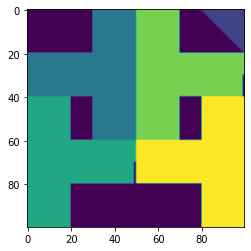

In [37]:
r = ndimage.rotate(figure_5, 180)
r[np.abs(r) < 0.1] = 0
c = np.copy(available_material_figures[1])
fit_figure_in_the_container(c, figure_5, 2)
fit_figure_in_the_container(c, r, 3)
fit_figure_in_the_container(c, r, 4)
fit_figure_in_the_container(c, figure_5, 5)
plt.imshow(c)

w_images = np.append(w_images, [c], axis = 0)
w_image_count = np.row_stack((w_image_count, [0,0,0,0,4]))
c[c==1] = 0
images = np.append(images, [c], axis = 0)
image_count = np.row_stack((image_count, [0,0,0,0,4]))

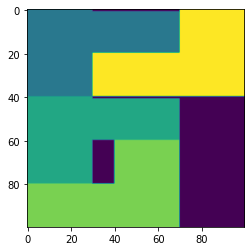

In [100]:
c = np.copy(available_material_figures[0])
fit_figure_in_the_container(c, rotate(figure_4, 180), 2)
fit_figure_in_the_container(c, rotate(figure_4, 180), 3)
fit_figure_in_the_container(c, figure_4, 4)
fit_figure_in_the_container(c, figure_4, 5)

plt.imshow(c)

w_images = np.append(w_images, [c], axis = 0)
w_image_count = np.row_stack((w_image_count, [0,0,0,4,0]))
c[c==1] = 0
images = np.append(images, [c], axis = 0)
image_count = np.row_stack((image_count, [0,0,0,4,0]))

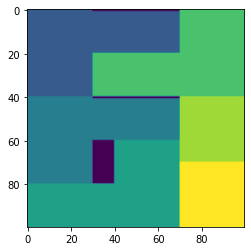

In [102]:
fit_figure_in_the_container(c, figure_2, 6)
fit_figure_in_the_container(c, figure_2, 7)

plt.imshow(c)

images = np.append(images, [c], axis = 0)
image_count = np.row_stack((image_count, [0,2,0,4,0]))

c[c==7] = 0

w_images = np.append(w_images, [c], axis = 0)
w_image_count = np.row_stack((w_image_count, [0,1,0,4,0]))


In [103]:
unique_combinations = np.unique(image_count, axis=0)
unique_combinations = np.array(unique_combinations, dtype = int)

In [25]:
res_w = pqdm(combinations, calc_2, n_jobs=10)

In [104]:
w_image_count = np.array(res_w)[:, 1]
w_images = np.array(res_w)[:, 0]

w_images = np.stack(w_images, axis=0)
w_image_count = np.stack(w_image_count, axis=0)
w_unique_combinations = np.unique(w_image_count, axis=0)
w_unique_combinations = np.array(w_unique_combinations, dtype = int)

In [73]:
np.save('w_images.npy', w_images)
np.save('w_image_count.npy', w_image_count)

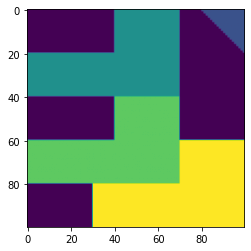

In [29]:
plt.imshow(w_images[100])

In [105]:
import gurobipy as gp
from gurobipy import GRB

In [106]:
#введем переменную 
#x_i - сколько паттернов i для целого листа было выбрано
#y_i - сколько паттернов i для листа отхода было выбрано

waste_lists_num = 50
model = gp.Model()

x_num = len(unique_combinations)
y_num = len(w_unique_combinations)
x = model.addVars(x_num, name='x', vtype=GRB.INTEGER)
y = model.addVars(y_num, name='y', vtype=GRB.INTEGER)

fig_order = [666, 450, 777, 1200, 700]

model.addConstrs((fig_order[i] == sum([(x[j] * unique_combinations[j][i]) for j in range(x_num)]) 
                  + sum([(y[j] * w_unique_combinations[j][i]) for j in range(y_num)]) for i in range(5)), name='each order completed')
model.addConstr(y.sum() <= waste_lists_num)

model.setObjective(x.sum(), GRB.MINIMIZE)
model.update()

# model.display()

In [107]:
model.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads
Optimize a model with 6 rows, 262 columns and 692 nonzeros
Model fingerprint: 0xc92a1397
Variable types: 0 continuous, 262 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 1e+03]
Found heuristic solution: objective 3793.0000000
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 6 rows, 260 columns, 691 nonzeros
Variable types: 0 continuous, 260 integer (0 binary)

Root relaxation: objective 7.857500e+02, 21 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  785.75000    0    1 3793.00000  785.75000  79.3%     -    0s
H    0     0                     786.0000000  785.75000  0.

In [109]:
a = model.getVars()
for i in range(x_num):
    if a[i].X>0:
        for idx in range(len(image_count)):
            if np.array_equal(image_count[idx], unique_combinations[i]):
                print(a[i].X, idx)
                break
    
print('wastes:')
for i in range(y_num):
    if a[i+x_num].X>0:
        for idx in range(len(w_image_count)):
            if np.array_equal(w_image_count[idx], w_unique_combinations[i]):
                print(a[i+x_num].X, idx)
                break

98.0 8640
100.0 8641
1.0 108
79.0 144
200.0 8642
308.0 4357
wastes:
50.0 2484


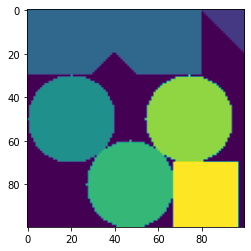

In [117]:
plt.imshow(w_images[2484])